In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [179]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Media Advertising Spend from 2012 to 2024

In [180]:
df = pd.read_excel('https://query.data.world/s/g4r6uemxhqbdekfktqhrsmfe7axudn')

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    13 non-null     object 
 1   Source  13 non-null     object 
 2   2012    13 non-null     int64  
 3   2013    13 non-null     int64  
 4   2014    13 non-null     int64  
 5   2015    13 non-null     int64  
 6   2016    13 non-null     float64
 7   2017    13 non-null     float64
 8   2018    13 non-null     int64  
 9   2019    13 non-null     float64
 10  2020    13 non-null     float64
 11  2021    13 non-null     int64  
 12  2022    13 non-null     int64  
 13  2023    13 non-null     float64
 14  2024    13 non-null     int64  
dtypes: float64(5), int64(8), object(2)
memory usage: 1.6+ KB


In [182]:
select_Types = ['TV','Radio','Newspaper','Magazines','Other','Pure-Play Internet']
non_Total_Filter = df.Type.isin(select_Types)
df = df[non_Total_Filter]

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 11
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    10 non-null     object 
 1   Source  10 non-null     object 
 2   2012    10 non-null     int64  
 3   2013    10 non-null     int64  
 4   2014    10 non-null     int64  
 5   2015    10 non-null     int64  
 6   2016    10 non-null     float64
 7   2017    10 non-null     float64
 8   2018    10 non-null     int64  
 9   2019    10 non-null     float64
 10  2020    10 non-null     float64
 11  2021    10 non-null     int64  
 12  2022    10 non-null     int64  
 13  2023    10 non-null     float64
 14  2024    10 non-null     int64  
dtypes: float64(5), int64(8), object(2)
memory usage: 1.2+ KB


#Converted the table to grid to perform the trend visualization

In [184]:
ad_spend_data = df.melt(id_vars=['Type','Source'],value_vars=[2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024], value_name='Ad_Spend',var_name='Year')

In [185]:
df[['Type','Source']]

,Type,Source
1,TV,National TV
2,TV,Local TV
3,Radio,Total Radio
5,Magazines,Total Magazines
6,Other,Out-of-Home
7,Other,Direct Mail
8,Other,Directories
9,Pure-Play Internet,Pure-Play Internet
10,Pure-Play Internet,Search
11,Pure-Play Internet,Ex-Search


In [186]:
ad_spend_data

,Type,Source,Year,Ad_Spend
0,TV,National TV,2012,3.858490e+10
1,TV,Local TV,2012,2.232990e+10
2,Radio,Total Radio,2012,1.630350e+10
3,Magazines,Total Magazines,2012,1.937050e+10
4,Other,Out-of-Home,2012,6.516700e+09
...,...,...,...,...
125,Other,Direct Mail,2024,1.194320e+10
126,Other,Directories,2024,6.780000e+07
127,Pure-Play Internet,Pure-Play Internet,2024,1.465957e+11
128,Pure-Play Internet,Search,2024,6.904700e+10


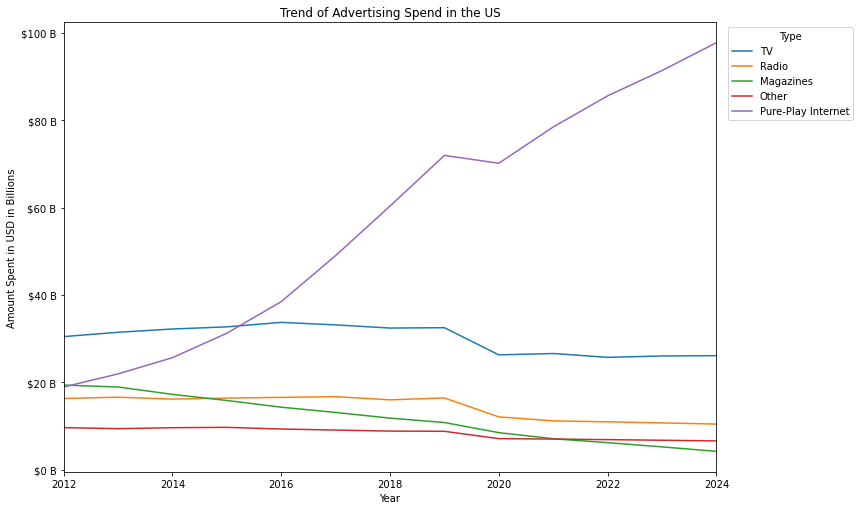

In [226]:
my_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=my_dims)
sns_Lineplot = sns.lineplot(ax=ax,data=ad_spend_data,x='Year',y='Ad_Spend',hue='Type',ci=None);
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set(xlim=(2012,2024))
y_ax_labels = ['${:,.0f}'.format(x) + ' B' for x in sns_Lineplot.get_yticks()/(10**9)]
sns_Lineplot.set_yticklabels(y_ax_labels)
plt.title('Trend of Advertising Spend in the US')
plt.ylabel("Amount Spent in USD in Billions")
sns.move_legend(ax, "upper left",bbox_to_anchor=(1.01,1))
filepath = '/content/drive/Othercomputers/My Laptop/data-science-assignments/04 - Statistical Inference/'
plt.savefig(filepath + "Trendline_US_Ad.svg", format="svg",bbox_inches='tight')

plt.show()